In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
groovewidth = 9
theta_expected = 71.56 #degrees
print(theta_expected)
max_discrep = 90-theta_expected
print(max_discrep)

# discrepancy = np.linspace(0,max_discrep,20)
#^^^^ to make sure my model indeed goes to zero when discrepancy equals phi = 90 - theta blaze (i.e. the minimum of this function should be zero)
# discrepancy = np.linspace(0,90,20) 
#^^^^0 to 90 was to test the light loss for 90 degrees (and indeed sin doesnt look linear when you can go up to 90 degrees,but this also isn't physical for my application)

discrepancy = np.linspace(0,1,20) #to test the light loss for 1 degree ##make sure this is the same length (20) as 'blazeangle_d'
# discrepancy = np.linspace(0,10,20) #to test the light loss for 10 degrees, and make sure the blaze width gets wider with decreasing groove width
# print(discrepancy)

71.56
18.439999999999998


In [3]:
theta_true = theta_expected + discrepancy
# print(theta_true)

In [4]:
W = groovewidth*np.sin(np.deg2rad(90-theta_true))
print(W)
Wmax = groovewidth*np.sin(np.deg2rad(90-theta_true[0]))
# print(Wmax)
# print(W/Wmax)

[2.8468026  2.83895854 2.83111208 2.82326323 2.81541199 2.80755839
 2.79970241 2.79184407 2.78398338 2.77612033 2.76825494 2.76038722
 2.75251717 2.74464479 2.7367701  2.7288931  2.7210138  2.7131322
 2.70524831 2.69736214]


In [5]:
# plt.figure(figsize=(7, 5))
# plt.plot(discrepancy,(Wmax-W)) ###???
# # plt.plot(discrepancy,100*(Wmax-W)/Wmax) #(Widthmax-Width)/Widthmax)*100
# plt.xlabel('blaze angle discrepancy [degrees]',size = 15)
# plt.ylabel('width lost due to shadowing',size = 15)
# plt.grid(linestyle='-', linewidth=1)

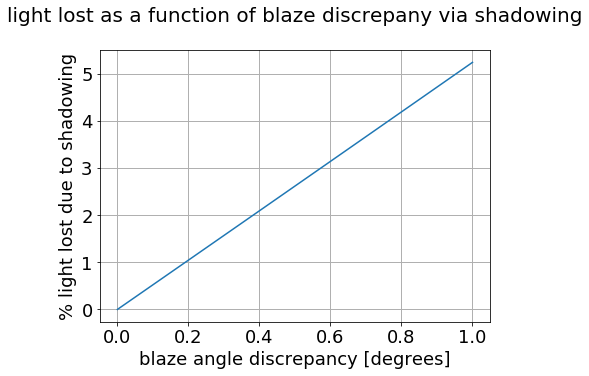

In [6]:
plt.figure(figsize=(7, 5))
# plt.plot(discrepancy,W/Wmax)
plt.plot(discrepancy,100*((Wmax-W)/Wmax))
plt.title('light lost as a function of blaze discrepany via shadowing'+'\n', size = 20)
plt.xlabel('blaze angle discrepancy [degrees]',size = 18)
plt.ylabel('% light lost due to shadowing',size = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(linestyle='-', linewidth=1)

# Now calulcate comb, envelope etc and bake in the new width produced by the adjustment that corresponds to a given blaze discrpancy

In [7]:

# wavelength = 0.635/3.4 #in um: IN IMMERSION bc /3.4
wavelength = 1.6/3.4 #in um: IN IMMERSION bc /3.4

groovespacing = 27.36 #in um .....27.36
beamwidth = 2500 #in um. 2000um = 2mm
inputangle = 71.56 #in degrees
inputangle = inputangle*np.pi/180 #in rad

outputangle_deg = np.linspace(-90,90,500000)
outputangle_rad = outputangle_deg*np.pi/180

In [8]:
###Start by setting up array of all orders m
m_vector = np.arange(-70, 70, 1)
# m_vector.shape

###Now, calulate the diffraction angle for each order
diffraction_centers = np.arcsin(np.sin(inputangle)+3.4*(m_vector*wavelength/groovespacing))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arcsin
  


In [9]:
###Make a mask to get rid of NaNs aka where the grating no longer reflects orders at the far wings
mask = np.isfinite(diffraction_centers)

###Apply mask to orders array and corresponding diffracted angle array:
m_vector = m_vector[mask]
diffraction_centers = diffraction_centers[mask]

###Broadcast diffracted angle array to a column (transpose):
diffraction_column_vector = np.expand_dims(diffraction_centers, 1)

In [10]:
#argument for beam diffraction sinc function:
argBD = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffraction_column_vector)
#Sinc function then is:
BeamDiffraction = (np.sin(argBD)/argBD)**2

n_orders = len(m_vector)


Text(0, 0.5, 'Intensity(degrees)')

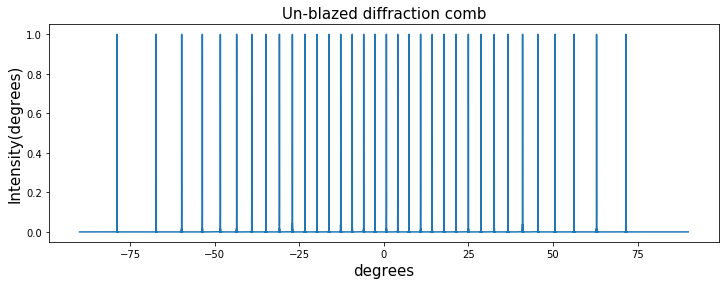

In [11]:
### Plot all the orders (the comb) in unblazed diffraction:
total_unblazed_diffraction = BeamDiffraction.sum(0) ######not sure what is happening here

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

plt.figure(figsize=(12, 4))
plt.plot(outputangle_rad*180/math.pi,total_unblazed_diffraction);
plt.xlabel('degrees',fontsize = 15)
plt.title('Un-blazed diffraction comb',fontsize = 15)
plt.ylabel('Intensity(degrees)',fontsize = 15)
# plt.plot(outputangle_rad*180/math.pi,BlazeEnvelope); ##may need to run whole code before this line is plottable
#plt.title('beam diffraction for m ={}'.format(m))
# plt.xlim(0,3)



### Now add blaze and multiply comb by blaze envelope

In [12]:
# ########################################### Enable in notebook zooming:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# ###########################################

In [13]:
###To make discrepancy easier to calculate:
theta_expected = 71.56

blazeangle_d = np.linspace(theta_expected, 72.56, 20) ##make sure this is the same length (20) as 'discrepancy'
blazeangle = blazeangle_d*np.pi/180 #in rad

##good that these two are currently the same:
# print((71.56+discrepancy))
# print(blazeangle_d)

In [ ]:
#### W I P next 2 cells ?????

In [14]:
# print(W)
Walpha = groovewidth*np.cos(np.deg2rad(theta_true)) #????theta_true, or alpha? 

In [15]:
# groovewidth = Walpha
groovewidth = W #is now an array corresponding to the 1 degree discrepancy (with 20 items)
argBE_master = []
BlazeEnvelope_master = []
total_blazed_diffraction_master =[]
# print(groovewidth[2])
counter = 0

#Counter allows me to iterate through the diff blaze angle discrepancies AND the corresponding groove width simultane
for i in blazeangle:

    ###arg for blaze envelope sinc function:
    argBE = (groovewidth[counter]*np.pi/wavelength)*np.sin(outputangle_rad-i) #groove width is now an array so you will get 20 odd sinc functions
    argBE_master.append(argBE)
#     print(groovewidth[counter])
    
    ###sinc function to describe the blaze envelope:
    BlazeEnvelope = (np.sin(argBE)/argBE)**2
    BlazeEnvelope_master.append(BlazeEnvelope)
    
    
    ###multiply together
    total_blazed_diffraction = total_unblazed_diffraction * BlazeEnvelope
    total_blazed_diffraction_master.append(total_blazed_diffraction)
    
    counter = counter +1

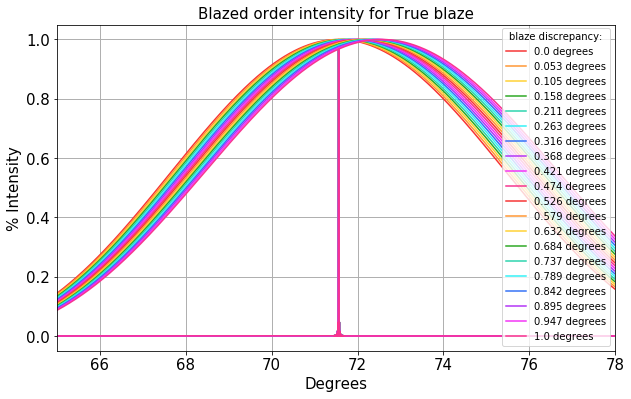

In [16]:
#####Plots all, probably don't want unless for texting a few
int=0
colors = ['#F73333','#FF9633','#FFD133','#2CA822','#2AD4AD','#33F1F7','#3371F7','#B333F7', '#F433F7', '#F7338F','#F73333','#FF9633','#FFD133','#2CA822','#2AD4AD','#33F1F7','#3371F7','#B333F7', '#F433F7', '#F7338F'] #https://htmlcolorcodes.com/ for more colors!!!
plt.figure(figsize=(10, 6))
for i,j in zip(total_blazed_diffraction_master,BlazeEnvelope_master):
    plt.plot(outputangle_rad*180/math.pi,i,label ='{} degrees'.format(round(discrepancy[int],3)), c = colors[int]);
    plt.plot(outputangle_rad*180/math.pi,j,c = colors[int]);
    plt.xlabel('Degrees', size = 15)
    plt.ylabel('% Intensity', size = 15)
    plt.grid(linestyle='-', linewidth=1)
#     plt.legend(loc='upper right')
    plt.legend(loc='lower right',title = 'blaze discrepancy:')
#     plt.legend(bbox_to_anchor=(1.15, 0.5),title = 'blazed order intensity '+'\n'+'for true blaze of:')
    plt.title('Blazed order intensity for True blaze', size = 15)# {}'.format(blazeangle_d[int]))
    int = int+1
    plt.xticks(size = 15)
    plt.yticks(size = 15)
#     plt.xlim(64,82)
    plt.xlim(65,78)
#     plt.axvline(71.5)
#     plt.axvline(72.6)



In [52]:
# #####Plots all, probably don't want unless for texting a few
# int=0
# colors = ['#F73333','#FF9633','#FFD133','#2CA822','#2AD4AD','#33F1F7','#3371F7','#B333F7', '#F433F7', '#F7338F'] #https://htmlcolorcodes.com/ for more colors!!!
# plt.figure(figsize=(10, 6))
# for i,j in zip(total_blazed_diffraction_master,BlazeEnvelope_master):
#     plt.plot(outputangle_rad*180/math.pi,i,label ='{} degrees'.format(round(blazeangle_d[int],3)), c = colors[int]);
# #     plt.plot(outputangle_rad*180/math.pi,j,label ='blaze envelope for blaze:{}'.format(blazeangle_d[int]),c = colors[int]);
#     plt.plot(outputangle_rad*180/math.pi,j,c = colors[int]);
#     plt.xlabel('Degrees', size = 15)
#     plt.ylabel('% Intensity', size = 15)
#     plt.grid(linestyle='-', linewidth=1)
# #     plt.legend(loc='upper right')
#     plt.legend(loc='lower right',title = 'True blaze:')
# #     plt.legend(bbox_to_anchor=(1.15, 0.5),title = 'blazed order intensity '+'\n'+'for true blaze of:')
#     plt.title('Blazed order intensity for True blaze, max width', size = 15)# {}'.format(blazeangle_d[int]))
#     int = int+1
#     plt.xticks(size = 15)
#     plt.yticks(size = 15)
#     plt.xlim(71,73)
# #     plt.axvline(71.5)
# #     plt.axvline(72.6)




## Now plot loss in intensity a a function of blaze angle discrepancy and the groove width decrease via shadowing

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 9 Text yticklabel objects>)

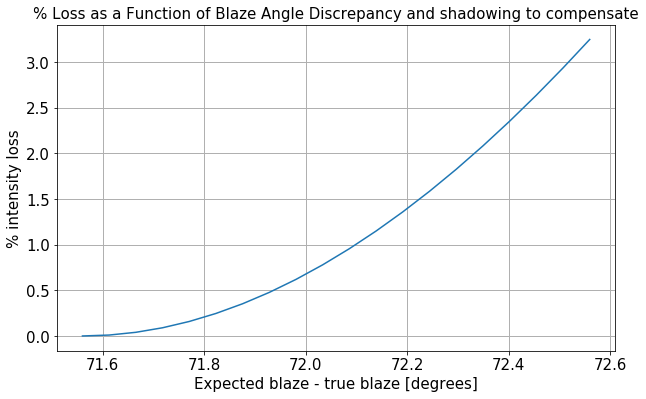

In [69]:
iterator = 0
lossarray=[]
degreediff_master=[]

for x in total_blazed_diffraction_master:
    if iterator == 0:
        expected = x[np.argmax(x)]
    iterator = iterator+1
    loss = expected - x[np.argmax(x)]
    loss = loss*100
    lossarray.append(loss)

for z in blazeangle_d:
#     degreediff = z - blazeangle_d[0]
    degreediff = z - discrepancy[0]
    degreediff_master.append(degreediff)
# print(lossarray)  
 

plt.figure(figsize=(10, 6))
plt.plot(degreediff_master,lossarray)#,label ='blazed diffraction');
plt.xlabel('')
# plt.axvspan(0, 0.1, color='red', alpha=0.5)
plt.grid(linestyle='-', linewidth=1)
plt.ylabel('% intensity loss',fontsize = 15)
plt.xlabel('Expected blaze - true blaze [degrees]',fontsize = 15)
# plt.legend(loc='upper right')
plt.title('% Loss as a Function of Blaze Angle Discrepancy and shadowing to compensate',fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
# plt.xlim(-0.02,0.4)